In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv

In [14]:
import seaborn as sns
# from ggplot import *

In [3]:
!pip install ggplot

    100% |████████████████████████████████| 2.2MB 240kB/s ta 0:00:01


In [3]:
data = read_csv('epi_r.csv')

In [25]:
data.drop(['#cakeweek','#wasteless'], inplace=True, axis=1)

KeyError: "['#cakeweek' '#wasteless'] not found in axis"

In [4]:
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data1 = read_csv('cleaned-recipes.csv')

In [7]:
data1.drop(['Unnamed: 0'], inplace=True, axis=1)

In [8]:
data1.drop(['X.cakeweek', 'X.wasteless'], inplace=True, axis=1)

In [9]:
data1.head()

,title,rating,calories,protein,fat,sodium,X22.minute.meals,X3.ingredient.recipes,X30.days.of.groceries,advance.prep.required,...,wok,yellow.squash,yogurt,yonkers,yuca,zucchini,cookbooks,snack,snack.week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426,30,7,559,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403,18,23,1439,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Potato and Fennel Soup Hodge,3.750,165,6,7,165,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Spinach Noodle Casserole,3.125,547,20,32,452,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Korean Marinated Beef,4.375,170,7,10,1272,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data_new = data1.iloc[:,[0,1,2,3,4,5]]

In [11]:
data_new["vegetarian"] = data1['vegetarian'].values

/home/apurv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
data_new.to_csv("new_data.csv")

Text(0.5,1,'Composistion of Veg and Non-Veg Recipes')

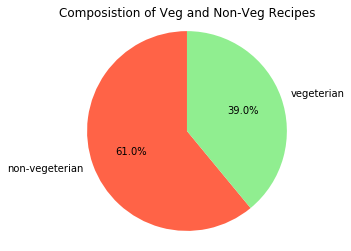

In [13]:
veg_nv = data1.groupby(["vegetarian"])["title"].count()
plt.figure(figsize=(4,4))
plt.pie(veg_nv,labels=["non-vegeterian","vegeterian"],autopct='%1.1f%%', startangle=90, colors=["tomato","lightgreen"])
plt.axis("equal")
plt.title("Composistion of Veg and Non-Veg Recipes")



/home/apurv/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Relationship between rating and calories')

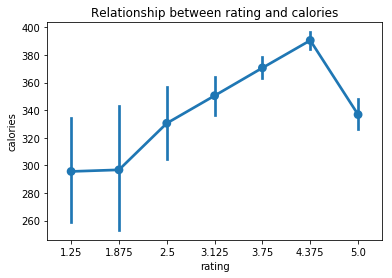

In [15]:
ax=sns.pointplot(x="rating",y="calories", data=data1)
ax.set(ylabel='calories')
plt.title("Relationship between rating and calories")

In [16]:
correlation = data1.iloc[:,1:6].corr()

Text(0.5,1,'Correlation between rating & nutrition features of recipes.')

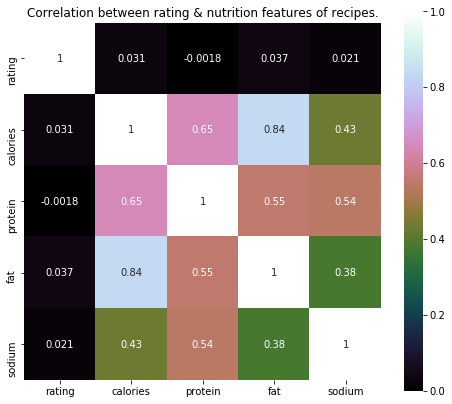

In [17]:
plt.figure(figsize=(8,7))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')
plt.title('Correlation between rating & nutrition features of recipes.')

Text(0.5,1,'Composistion of Veg and Non-Veg Recipes in 5-star ratings')

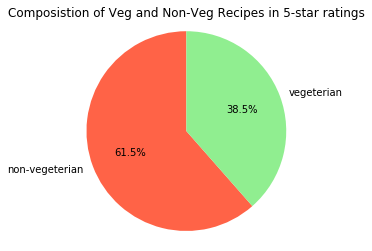

In [18]:
recipes_5 = data1[data1["rating"] == 5]
veg_nv = recipes_5.groupby(["vegetarian"])["title"].count()
plt.figure(figsize=(4,4))
plt.pie(veg_nv,labels=["non-vegeterian","vegeterian"],autopct='%1.1f%%', startangle=90, colors=["tomato","lightgreen"])
plt.axis("equal")
plt.title("Composistion of Veg and Non-Veg Recipes in 5-star ratings")

/home/apurv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1.08,'Composistion of usage of Fruits in 5-star rated recipes')

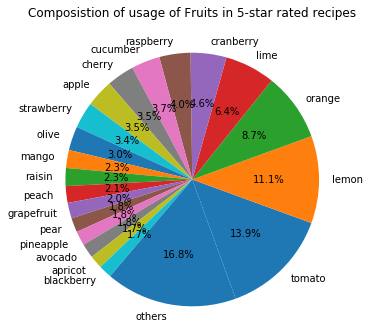

In [19]:
fruit = ["Apple","Apricot","Avocado","Banana","Bilberry","Blackberry","Blackcurrant","Blueberry","Boysenberry","Currant","Cherry","Cherimoya","Cloudberry","Coconut","Cranberry","Cucumber","Custard apple","Damson","Date","Dragonfruit","Durian","Elderberry","Feijoa","Fig","Goji berry","Gooseberry","Grape","Raisin","Grapefruit","Guava","Honeyberry","Huckleberry","Jabuticaba","Jackfruit","Jambul","Jujube","Juniper berry","Kiwifruit","Kumquat","Lemon","Lime","Loquat","Longan","Lychee","Mango","Marionberry","Melon","Cantaloupe","Honeydew","Watermelon","Miracle fruit","Mulberry","Nectarine","Nance","Olive","Orange","Blood orange","Clementine","Mandarine","Tangerine","Papaya","Passionfruit","Peach","Pear","Persimmon","Physalis","Plantain","Plum","Prune (dried plum)","Pineapple","Plumcot (or Pluot)","Pomegranate","Pomelo","Purple mangosteen","Quince","Raspberry","Salmonberry","Rambutan","Redcurrant","Salal berry","Salak","Satsuma","Star fruit","Strawberry","Tamarillo","Tamarind","Tomato","Ugli fruit","Yuzu"]
fruit = [x.lower() for x in fruit]
dd = data1[data1.vegetarian==0 ][data1.rating == 5.0][list(set(fruit).intersection(data1.columns.tolist()))].sum(axis=0).sort_values(ascending=False)
dx = dd[:20]
dx["others"]= dd[20:].sum()
plt.figure(figsize=(5,5))
plt.pie(dx,labels=dx.index,autopct='%1.1f%%', startangle=290)
plt.axis("equal")
plt.title("Composistion of usage of Fruits in 5-star rated recipes", y =1.08)



In [20]:
data_new1 = data_new[data_new["calories"] > 201]

In [21]:
data_new1 = data_new1[data_new1["calories"] < 501]

In [22]:
data_new1.sort_values("calories")

,title,rating,calories,protein,fat,sodium,vegetarian
621,Custard Sauce,4.375,202,7,10,52,0
2587,Farmhouse Butternut Squash Soup,4.375,202,7,8,488,0
10564,Raspberry Cheesecake Brownies,3.750,202,3,11,145,0
10559,Haitian Coleslaw,4.375,202,2,17,154,1
2857,Green Mayonnaise,5.000,202,0,22,174,0
4732,Tangerine Granita with Vanilla Bean Cream,4.375,202,1,5,7,1
356,Beet Carpaccio with Goat Cheese and Arugula,4.375,202,7,16,187,1
851,Homemade Ricotta Cheese,5.000,202,8,13,469,0
3417,Crispy Fried Shallots,4.375,202,2,15,12,0
3427,Fresh Homemade Ricotta,5.000,202,8,13,256,0


In [23]:
import ujson
import pprint
import json
!pip install ijson
import ijson
import csv

In [24]:
infile = open("full_format_recipes.json", "r")
outfile = open("barot.csv", "w")
writer = csv.writer(outfile)

In [10]:
for row in infile:
    dat = json.loads(row)
    writer.writerow(dat)

In [25]:
with open('full_format_recipes.json') as json_file:      
    dat = json_file.readlines()
    # this line below may take at least 8-10 minutes of processing for 4-5 million rows. It converts all strings in list to actual json objects. 
    dat = list(map(json.loads, dat)) 

close_dat = pd.DataFrame(dat)

In [165]:
dat_i = close_dat.transpose()

In [166]:
len({})

0

In [167]:
dat_i = dat_i[dat_i[0].ma > 0]

In [183]:
dat_i[0][1200]

{'directions': ['Put oven rack in middle position and preheat oven to 350°F.',
  'Discard crusts from bread and cut bread into 40 (1 1/2-inch) triangles. Arrange triangles in a shallow baking pan (1 inch deep), then brush tops with butter and sprinkle with salt. Bake until golden, 10 to 12 minutes, then cool.',
  'If using large herring, discard skin and dark flesh. Cut large or small herring into 1/4-inch pieces. Whisk together remaining ingredients in a bowl, then stir in herring. Top each toast with 1/2 teaspoon curried herring.',
  '*Look for jarred fillet pieces of herring (sometimes labeled "Tidbits") sold in the refrigerated section of the supermarket.'],
 'fat': 8.0,
 'date': '2004-08-20T04:00:00.000Z',
 'categories': ['Fish',
  'Mustard',
  'Appetizer',
  'Bake',
  'Picnic',
  'Quick & Easy',
  'Mayonnaise',
  'Curry',
  'Winter',
  'Chive',
  'Potluck',
  'Sour Cream',
  'Gourmet',
  'Kidney Friendly',
  'Pescatarian',
  'Peanut Free',
  'Tree Nut Free',
  'Soy Free',
  'Kosh

In [26]:
close_dat = close_dat[close_dat[0].map(len) > 1]

In [27]:
close_dat

,0,1,2,3,4,5,6,7,8,9,...,20120,20121,20122,20123,20124,20125,20126,20127,20128,20129
0,"{'directions': ['1. Place the stock, lentils, ...",{'directions': ['Combine first 9 ingredients i...,{'directions': ['In a large heavy saucepan coo...,{'directions': ['Heat oil in heavy large skill...,{'directions': ['Preheat oven to 350°F. Lightl...,"{'directions': ['Mix basil, mayonnaise and but...",{'directions': ['Cook potatoes and carrots in ...,{'directions': ['Stir together sugar and chili...,"{'directions': ['Stir together soy sauce, suga...",{'directions': ['Chop enough parsley leaves to...,...,{'directions': ['Bring all ingredients to a si...,{'directions': ['1. Preheat the oven to 400°F....,{'directions': ['Mix first 4 ingredients in la...,"{'directions': ['Stir water, sugar and juice i...",{'directions': ['Wash spareribs. Remove excess...,{'directions': ['Beat whites in a bowl with an...,{'directions': ['Bring broth to simmer in sauc...,"{'directions': ['Using a sharp knife, cut a sh...",{'directions': ['Heat 2 tablespoons oil in hea...,{'directions': ['Position rack in bottom third...


In [28]:
for i in range(0,20130):
    if not bool(close_dat[i][0]):
        close_dat

In [29]:
jsonRec4 = {}
for i in range(19548, 20130):
    jsonRec4.update({close_dat[i][0]['title']:close_dat[i][0]})

In [30]:
with open("finally4.json", 'w') as f:
    json.dump(jsonRec4, f)

In [31]:
jsonDat = json.loads("finally.json")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [32]:
d1 = pd.read_json("finally.json").T
d2 = pd.read_json("finally2.json").T
d3 = pd.read_json("finally3.json").T
d4 = pd.read_json("finally4.json").T

In [33]:
d1 = d1[["title","directions","ingredients","calories"]]
d2 = d2[["title","directions","ingredients","calories"]]
d3 = d3[["title","directions","ingredients","calories"]]
d4 = d4[["title","directions","ingredients","calories"]]

In [18]:
final.set_index("title")

NameError: name 'final' is not defined

In [34]:
D = d1.append(d2)
D1 = D.append(d3)
D2 = D1.append(D1)

In [35]:
D3= D2.set_index("title")

In [36]:
D3 = D3[D3["calories"] > 301]

In [37]:
D3 = D3[D3["calories"] < 701]

,directions,ingredients,calories
title,,,
Artichoke Croustades,[Roll each bread slice flat with a rolling pin...,"[18 slices of very soft white bread, the crust...",375.0
"Scrambled Eggs with Avocado, Onion, and Cheddar","[Chop onion. Halve, pit, and peel avocado and ...","[1 small onion, 1/2 firm-ripe California avoca...",390.0
Nectarine and Blueberry Clafouti,[Preheat oven to 325°F. and butter a 2-quart s...,"[2 nectarines (about 1/2 pound), 1 cup blueber...",328.0
"Spaghetti with Asparagus, Shiitake Mushrooms, Lemon, and Chives",[Cook spaghetti in large pot of boiling salted...,"[12 ounces spaghetti, 4 tablespoons butter, di...",671.0
Summer Strawberry Jam,[Bring first 3 ingredients to boil in large sa...,"[1 1/2 cups sugar, 1/2 cup water, 1 tablespoon...",315.0
Spaghetti with Anchovy Olive Sauce,[In a large heavy skillet (measuring at least ...,"[5 large garlic cloves, sliced thin, 1/3 cup o...",648.0
Small Pear and Almond Cakes,"[Peel pears, leaving stems intact, then core f...",[12 firm small Seckel pears (2 to 3 inches lon...,562.0
Sherried Chicken Wings with Mushrooms and Peas,"[Cut off the wing tips, reserving them for ano...","[2 pounds chicken wings (about 10), all-purpos...",653.0
Braised Rabbit with Grainy Mustard Sauce,"[Rinse rabbit pieces and remove any fat, then ...","[2 (3-pound) rabbits*, each cut into 6 serving...",662.0


In [38]:
D3.to_csv("finito.csv")

In [39]:
final.drop(['level_0', 'index'], inplace=True,axis=1)

NameError: name 'final' is not defined

In [58]:
dfinal = final.merge(D3, on="title", how = 'inner')

In [60]:
D3.to_csv("d.csv")

In [57]:
pd.merge(final, D3, on='title', how='left')

,title,rating,calories,protein,fat,sodium,vegetarian,directions,ingredients
0,"Lentil, Apple, and Turkey Wrap",2.500,426,30,7,559,0,NaN,NaN
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403,18,23,1439,0,NaN,NaN
2,Potato and Fennel Soup Hodge,3.750,165,6,7,165,0,NaN,NaN
3,Spinach Noodle Casserole,3.125,547,20,32,452,1,NaN,NaN
4,Korean Marinated Beef,4.375,170,7,10,1272,0,NaN,NaN
5,"Yams Braised with Cream, Rosemary and Nutmeg",3.750,256,4,5,30,0,NaN,NaN
6,Banana-Chocolate Chip Cake With Peanut Butter ...,4.375,766,12,48,439,1,NaN,NaN
7,Beef Tenderloin with Garlic and Brandy,4.375,174,11,12,176,0,NaN,NaN
8,Peach Mustard,3.125,134,4,3,1394,0,NaN,NaN
9,Raw Cream of Spinach Soup,4.375,382,5,31,977,1,NaN,NaN


In [269]:
d1 = d1.iloc[1,2]

'2006-10-20T15:08:19.000Z'

In [19]:
final = pd.read_csv("cleaned-recipes-withV.csv")

In [20]:
final = final.drop("Unnamed: 0", axis=1)

In [21]:
final.set_index('title')

,rating,calories,protein,fat,sodium,vegetarian
title,,,,,,
"Lentil, Apple, and Turkey Wrap",2.500,426,30,7,559,0
Boudin Blanc Terrine with Red Onion Confit,4.375,403,18,23,1439,0
Potato and Fennel Soup Hodge,3.750,165,6,7,165,0
Spinach Noodle Casserole,3.125,547,20,32,452,1
Korean Marinated Beef,4.375,170,7,10,1272,0
"Yams Braised with Cream, Rosemary and Nutmeg",3.750,256,4,5,30,0
Banana-Chocolate Chip Cake With Peanut Butter Frosting,4.375,766,12,48,439,1
Beef Tenderloin with Garlic and Brandy,4.375,174,11,12,176,0
Peach Mustard,3.125,134,4,3,1394,0


In [260]:
d1

,calories,categories,date,desc,directions,fat,ingredients,protein,rating,sodium,title
Arugula Pesto,None,"[Sauce, Leafy Green, Vegetable, Vegetarian, Ar...",2012-09-13T04:00:00.000Z,None,"[1. In a food processor, combine the walnuts, ...",None,"[1/2 cup (2 oz/60 g) walnut pieces, 1 garlic c...",None,5,None,Arugula Pesto
Chocolate Cranberry Cakes with Bourbon Whipped Cream,865,"[Bourbon, Food Processor, Mixer, Chocolate, Da...",2006-10-20T15:08:19.000Z,These luscious cranberry-studded cakes enriche...,[Put oven rack in middle position and preheat ...,58,[1 1/4 sticks (10 tablespoons) unsalted butter...,8,3.75,74,Chocolate Cranberry Cakes with Bourbon Whipped...
Roast Turkey with Savory Cranberry Sauce From the Titanic,1512,"[Herb, turkey, Roast, Thanksgiving, Dinner, Cr...",2010-11-23T04:00:00.000Z,"By the turn of the century, the North American...","[In skillet, melt butter over medium heat. Sti...",55,"[1 10 lb turkey, 2 tablespoons butter, softene...",179,5,2904,Roast Turkey with Savory Cranberry Sauce From ...
Cornmeal Cake with Buttermilk Ice Cream and Rhubarb Compote,None,"[Cake, Milk/Cream, Dessert, Bake, Easter, Corn...",2008-01-29T21:52:40.000Z,A little cornmeal gives the cake a crunchy tex...,[Preheat oven to 350°F. Generously butter 9-in...,None,"[1 cup all purpose flour, 1/2 cup yellow cornm...",None,5,None,Cornmeal Cake with Buttermilk Ice Cream and Rh...
"Scallop Ceviche with ""Tiger's Milk""",None,"[Milk/Cream, Appetizer, Poach, Quick & Easy, S...",2009-04-14T04:00:00.000Z,"In a country known for its fascinating, wide-r...","[Steam sweet potato in a steamer rack, covered...",None,"[1 cup diced (1/3-inch) peeled sweet potato, 1...",None,4.375,None,"Scallop Ceviche with ""Tiger's Milk"""
Artichoke Croustades,375,"[Vegetable, Appetizer, Broil, Vegetarian, Parm...",2004-08-20T04:00:00.000Z,None,[Roll each bread slice flat with a rolling pin...,16,"[18 slices of very soft white bread, the crust...",13,3.75,609,Artichoke Croustades
Lemon Fettuccine with Asparagus and Salmon Caviar,878,"[Citrus, Pasta, Vegetable, Side, Valentine's D...",2004-08-20T04:00:00.000Z,The pasta and sauce cook simultaneously (so tw...,[Cook pasta in large pot of boiling salted wat...,71,"[3 ounces fettuccine, 8 ounces asparagus, trim...",26,3.75,677,Lemon Fettuccine with Asparagus and Salmon Cav...
Pork Wrapped in Sage and Prosciutto,244,"[Roast, Quick & Easy, Pork Tenderloin, Prosciu...",2005-08-12T18:27:45.000Z,None,[Put oven rack in middle position and preheat ...,9,"[12 thin slices prosciutto (about 1/4 lb), 16 ...",37,3.75,782,Pork Wrapped in Sage and Prosciutto
"Scrambled Eggs with Avocado, Onion, and Cheddar",390,"[Cheese, Egg, Onion, Vegetable, Breakfast, Bru...",2004-08-20T04:00:00.000Z,This recipe can be prepared in 45 minutes or l...,"[Chop onion. Halve, pit, and peel avocado and ...",31,"[1 small onion, 1/2 firm-ripe California avoca...",17,3.75,211,"Scrambled Eggs with Avocado, Onion, and Cheddar"
Nectarine and Blueberry Clafouti,328,"[Berry, Fruit, Dessert, Bake, Blueberry, Necta...",2004-08-20T04:00:00.000Z,"We admit we've never been big clafouti fans, b...",[Preheat oven to 325°F. and butter a 2-quart s...,14,"[2 nectarines (about 1/2 pound), 1 cup blueber...",7,3.75,115,Nectarine and Blueberry Clafouti


In [70]:
D3

,title,directions,ingredients
0,Arugula Pesto,"[1. In a food processor, combine the walnuts, ...","[1/2 cup (2 oz/60 g) walnut pieces, 1 garlic c..."
1,Chocolate Cranberry Cakes with Bourbon Whipped...,[Put oven rack in middle position and preheat ...,[1 1/4 sticks (10 tablespoons) unsalted butter...
2,Roast Turkey with Savory Cranberry Sauce From ...,"[In skillet, melt butter over medium heat. Sti...","[1 10 lb turkey, 2 tablespoons butter, softene..."
3,Cornmeal Cake with Buttermilk Ice Cream and Rh...,[Preheat oven to 350°F. Generously butter 9-in...,"[1 cup all purpose flour, 1/2 cup yellow cornm..."
4,"Scallop Ceviche with ""Tiger's Milk""","[Steam sweet potato in a steamer rack, covered...","[1 cup diced (1/3-inch) peeled sweet potato, 1..."
5,Artichoke Croustades,[Roll each bread slice flat with a rolling pin...,"[18 slices of very soft white bread, the crust..."
6,Lemon Fettuccine with Asparagus and Salmon Cav...,[Cook pasta in large pot of boiling salted wat...,"[3 ounces fettuccine, 8 ounces asparagus, trim..."
7,Pork Wrapped in Sage and Prosciutto,[Put oven rack in middle position and preheat ...,"[12 thin slices prosciutto (about 1/4 lb), 16 ..."
8,"Scrambled Eggs with Avocado, Onion, and Cheddar","[Chop onion. Halve, pit, and peel avocado and ...","[1 small onion, 1/2 firm-ripe California avoca..."
9,Nectarine and Blueberry Clafouti,[Preheat oven to 325°F. and butter a 2-quart s...,"[2 nectarines (about 1/2 pound), 1 cup blueber..."
